<b>ML_GROUP059 | Assignment 9 | ML_GROUP059_A1_Asg9_Q2 </b>
----------------------------------------
<br>The following dataset is used to classify the car acceptability into classes: unacceptable, acceptable, good and very good

<b>Feature Description</b><br>

Independent Variables:<br>
   
Cost                 {'vhigh','high', 'med', 'low'}<br>
Maintenance cost     {'vhigh','high', 'med', 'low'}<br>
Doors                {2,3,4,5more}<br>
Persons              {2,4,more}<br>
Lug_boot             {'small', 'med', 'big'}<br>
Safety               {'high', 'med', 'low'}<br>

Target Variable:<br>

Decison              {'vgood','good','acc','unacc'}

In [224]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [225]:
#lets check the current working directory
from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

'/Users/pkoduri/PK_Data/Trainings/BITS_Mtech/Sem2/Assignments/ML_Asg/A1/2'

Importing data from the provided csv file.<br>
Column names missing in the csv - Supply column names as appropriate from the description file

In [226]:
data = pd.read_csv('car.data.csv',index_col=None,header=None,names=["cost", "maint", "doors", "persons","lug_boot","safety","decision"])

In [227]:
#Getting a feel of the data imported
data.head()

,cost,maint,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [228]:
# Check data for any null values - Description file claims there are no null values - confirming
data.isnull().sum() 

cost        0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
decision    0
dtype: int64

In [229]:
#Replace any '?' in data with NAN values
data = data.apply(lambda x: x.str.strip()).replace('?', np.nan)

In [230]:
# Trying to describe the data and see various attributes


print("Reviewing data......",data.head())

print("\n\n\nShape of data...",data.shape)

print("\n\n\nDescribing different numeric attributes...",data.describe().T)

print("\n\n\nUnderstanding different attributes types...\n\n")
print(data.info())

Reviewing data......     cost  maint doors persons lug_boot safety decision
0  vhigh  vhigh     2       2    small    low    unacc
1  vhigh  vhigh     2       2    small    med    unacc
2  vhigh  vhigh     2       2    small   high    unacc
3  vhigh  vhigh     2       2      med    low    unacc
4  vhigh  vhigh     2       2      med    med    unacc



Shape of data... (1728, 7)



Describing different numeric attributes...          count unique    top  freq
cost      1728      4   high   432
maint     1728      4   high   432
doors     1728      4  5more   432
persons   1728      3      4   576
lug_boot  1728      3  small   576
safety    1728      3   high   576
decision  1728      4  unacc  1210



Understanding different attributes types...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
cost        1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_bo

#### Lets understand the impact of each variable on the Target variable

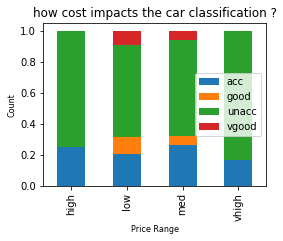

In [231]:
#how cost measure impacts the classification
var = pd.crosstab(data['cost'], data['decision'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how cost impacts the car classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

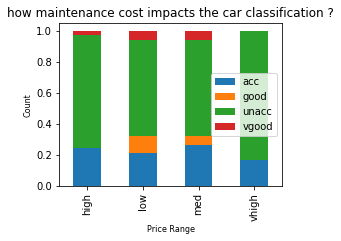

In [232]:
#how maintenance cost impacts the classification
var = pd.crosstab(data['maint'], data['decision'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how maintenance cost impacts the car classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

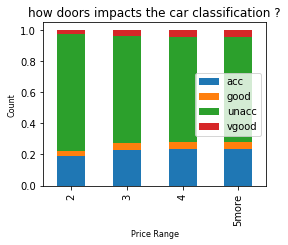

In [233]:
#how doors impacts the classification
var = pd.crosstab(data['doors'], data['decision'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how doors impacts the car classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

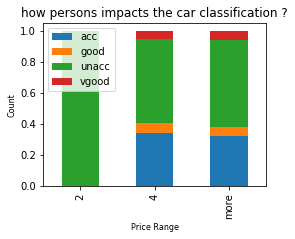

In [234]:
#how persons impacts the classification
var = pd.crosstab(data['persons'], data['decision'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how persons impacts the car classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

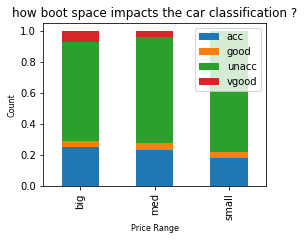

In [235]:
#how boot space impacts the classification
var = pd.crosstab(data['lug_boot'], data['decision'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how boot space impacts the car classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

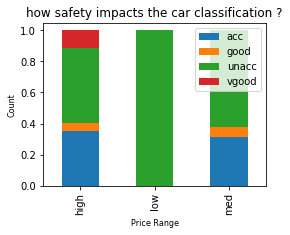

In [236]:
#how safety impacts the classification
var = pd.crosstab(data['safety'], data['decision'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how safety impacts the car classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

<b>Feature Processing / Cleaning:</b>

In [237]:
#Understand unique values for each of the categorical attributes

print('cost    [Unique values]    -->',data['cost'].unique())
print('maint   [Unique values]   -->',data['maint'].unique())
print('lug_boot[Unique values]   -->',data['lug_boot'].unique())
print('safety  [Unique values]   -->',data['safety'].unique())
print('decision[Unique values]  -->',data['decision'].unique())

cost    [Unique values]    --> ['vhigh' 'high' 'med' 'low']
maint   [Unique values]   --> ['vhigh' 'high' 'med' 'low']
lug_boot[Unique values]   --> ['small' 'med' 'big']
safety  [Unique values]   --> ['low' 'med' 'high']
decision[Unique values]  --> ['unacc' 'acc' 'vgood' 'good']


In [238]:
#Map ordinal values to a number in an order

data['cost'].replace(('vhigh','high', 'med', 'low'),(3,2,1,0),inplace=True)
data['maint'].replace(('vhigh','high', 'med', 'low'),(3,2,1,0),inplace=True)
data['lug_boot'].replace(('big', 'med', 'small'),(2,1,0),inplace=True)
data['safety'].replace(('high', 'med', 'low'),(2,1,0),inplace=True)
data['decision'].replace(('vgood','good','acc','unacc'),(3,2,1,0),inplace=True)

In [239]:
#Replace category with a value and covert data to numeric

data['doors'].replace('5more', 5, inplace = True)
data['persons'].replace('more', 5, inplace = True)
data['doors'] = pd.to_numeric(data['doors'])
data['persons'] = pd.to_numeric(data['persons'])

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
cost        1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
decision    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


<b>Data Visualization</b> to get an insight about different features and their relation

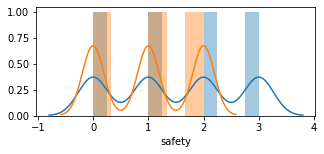

In [241]:
#Plot the distribution of cost vs safety to get an understanding on how they are related

plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(data['cost'])
sns.distplot(data['safety'])

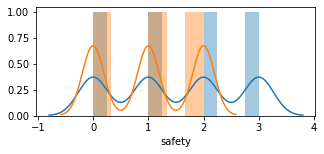

In [242]:
#Plot the distribution of maintenance vs safety to get an understanding on how they are related

plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(data['maint'])
sns.distplot(data['safety'])

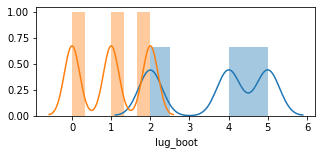

In [243]:
#Plot the distribution of persons vs boot space to get an understanding on how they are related

plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(data['persons'])
sns.distplot(data['lug_boot'])

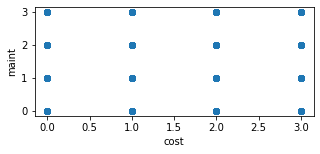

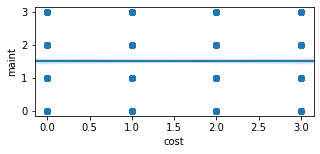

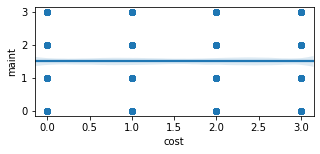

In [244]:
# Let us plot and see how cost and maintenance are scattered and we shall fit a line for that
plt.figure(figsize=(5,2))
# A regular scatter plot
sns.regplot(x=data["cost"], y=data["maint"], fit_reg=False)
plt.show()

plt.figure(figsize=(5,2))
# A scatter plot with a linear regression fit:
sns.regplot(x=data["cost"], y=data["maint"], fit_reg=True)
plt.show()

plt.figure(figsize=(5,2))
# A scatter plot with a polynomial regression fit:
sns.regplot(x=data["cost"], y=data["maint"], fit_reg=True, order=4)
plt.show()

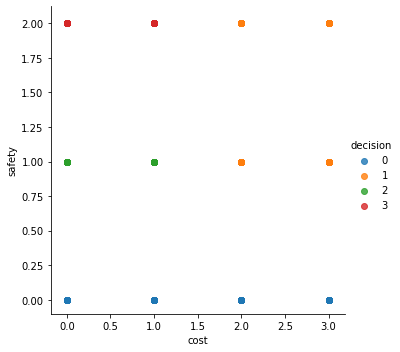

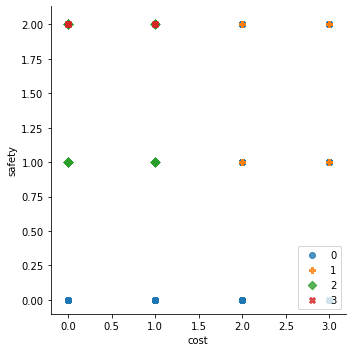

In [245]:
# Let us visualize the data for cost and safety w.r.t decision

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="cost", y="safety", data=data, fit_reg=False, hue='decision', legend=True)
plt.show()

sns.lmplot( x="cost", y="safety", data=data, fit_reg=False, hue='decision', legend=False, markers=["o", "P", "D","X"])
plt.legend(loc='lower right')
plt.show()

<b>Correlation:</b>Let's understand the correlation among different attributes:

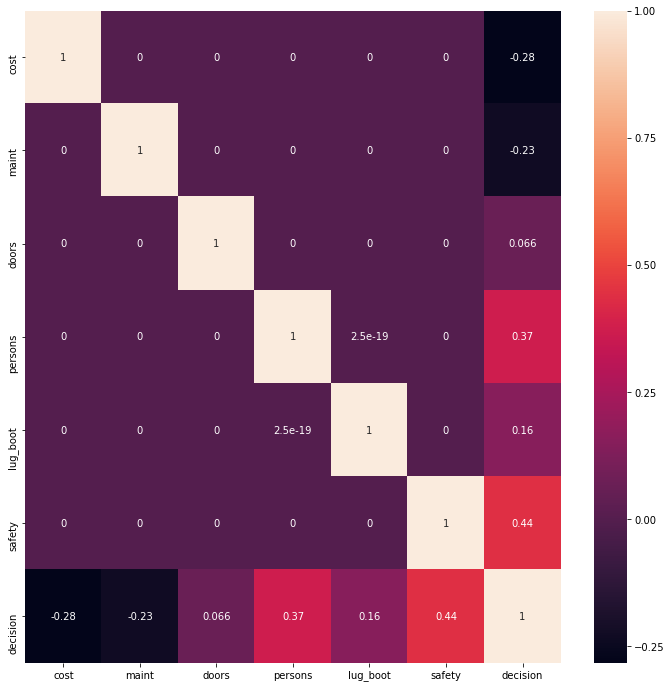

In [246]:
plt.figure(figsize = (12,12))        # Size of the figure

sns.heatmap(data.corr(),annot = True)

In [247]:
data.corr()

,cost,maint,doors,persons,lug_boot,safety,decision
cost,1.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.282750
maint,0.00000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.232422
doors,0.00000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.066057
persons,0.00000,0.000000,0.000000,1.000000e+00,2.523651e-19,0.000000,0.373459
lug_boot,0.00000,0.000000,0.000000,2.523651e-19,1.000000e+00,0.000000,0.157932
safety,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.439337
decision,-0.28275,-0.232422,0.066057,3.734592e-01,1.579317e-01,0.439337,1.000000


#### Notes: Correlation analysis
Not much correlation between features.<br>

Persons and Lug_boot are negatively correlated that's all.<br>
All features are impacting target variable.

In [248]:
x=data.drop(["lug_boot"],axis=1)

<b>Training the model:</b>

i.  First let's separate the Independent and Dependent variables <br>
ii. Then Split the data to Train and Test sets<br>
iii.Fit different models<br>
iv. Try cross Validations<br>
v.  View results and preformance metrics

In [249]:
y=data["decision"]
x=data.drop(["decision"],axis=1)

In [250]:
#Declare variables to hold the algorithm name and its successes.
score=[] 
algorithms=[] 

In [251]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.35)

#### KNeighborsClassifier Classifier

KNN accuracy = 92.06611570247934
KNN confusion Matrix  :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       428
           1       0.87      0.85      0.86       131
           2       0.72      0.52      0.60        25
           3       0.94      0.71      0.81        21

    accuracy                           0.92       605
   macro avg       0.87      0.76      0.81       605
weighted avg       0.92      0.92      0.92       605



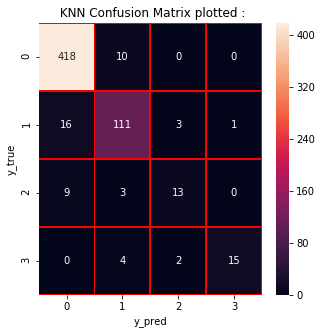

In [252]:
# Training a KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
print("KNN confusion Matrix  :")
print(classification_report(y_test,y_pred))
plt.title(" KNN Confusion Matrix plotted :")
plt.show()

#### KNeighborsClassifier Classifier - Cross Validation

In [253]:
# 10- foldCross Validation using KNeighborsClassifier 
knn_cv_r10_scores = cross_val_score(knn, x, y, cv=10)
print(knn_cv_r10_scores)
print("KNN Mean 10-Fold R Squared: {}".format(np.mean(knn_cv_r10_scores)))

[0.90229885 0.67816092 0.70689655 0.70114943 0.8265896  0.78488372
 0.81395349 0.89534884 0.88372093 0.74853801]
KNN Mean 10-Fold R Squared: 0.7941540330942252


#### Gaussian Navie-Bayes Classifier 

Navie Bayes accuracy = 78.51239669421489
Navie Bayes Confusion Matrix  
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       428
           1       0.69      0.35      0.46       131
           2       0.50      0.24      0.32        25
           3       0.25      1.00      0.40        21

    accuracy                           0.79       605
   macro avg       0.59      0.63      0.53       605
weighted avg       0.82      0.79      0.78       605



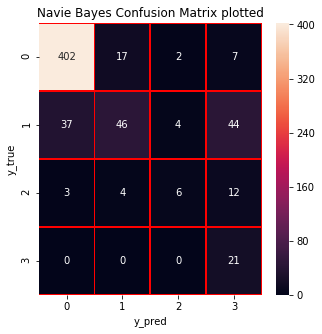

In [254]:
## Training a Gaussian Navie-Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
print("Navie Bayes Confusion Matrix  ")
print(classification_report(y_test,y_pred))
plt.title("Navie Bayes Confusion Matrix plotted")
plt.show()

#### Gaussian Navie-Bayes Classifier - Cross Validation

In [255]:
# 10- foldCross Validation using GaussianNB 

gnb_cv_r10_scores = cross_val_score(nb, x, y, cv=10)
print(gnb_cv_r10_scores)
print("GNB Mean 10-Fold R Squared: {}".format(np.mean(gnb_cv_r10_scores)))

[0.74137931 0.71264368 0.77586207 0.62643678 0.75144509 0.70930233
 0.77325581 0.79651163 0.79651163 0.73684211]
GNB Mean 10-Fold R Squared: 0.7420190426397657


#### RandomForest Classifier - Cross Validation

Random Forest accuracy = 0.9652892561983472
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       428
           1       0.91      0.94      0.92       131
           2       0.88      0.88      0.88        25
           3       0.95      0.90      0.93        21

    accuracy                           0.97       605
   macro avg       0.93      0.93      0.93       605
weighted avg       0.97      0.97      0.97       605



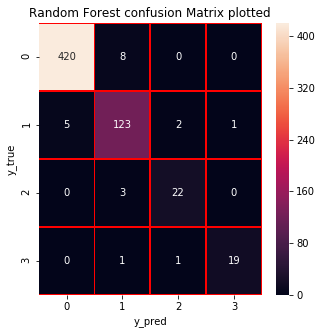

In [256]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
print(classification_report(y_test,y_pred))
plt.title("Random Forest confusion Matrix plotted")
plt.show()

#### RandomForest Classifier - Cross Validation

In [257]:
# 10- foldCross Validation using Random Forest 

rf_cv_r10_scores = cross_val_score(rf, x, y, cv=10)
print(rf_cv_r10_scores)
print("Random Forest Mean 10-Fold R Squared: {}".format(np.mean(rf_cv_r10_scores)))

[0.90229885 0.79310345 0.79885057 0.75862069 0.91907514 0.94767442
 0.89534884 0.91860465 0.96511628 0.86549708]
Random Forest Mean 10-Fold R Squared: 0.8764189969796965


#### LogisticRegression Classifier 

test accuracy 0.7900826446280992
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       428
           1       0.57      0.51      0.54       131
           2       0.33      0.12      0.18        25
           3       0.20      0.05      0.08        21

    accuracy                           0.79       605
   macro avg       0.49      0.41      0.42       605
weighted avg       0.75      0.79      0.77       605



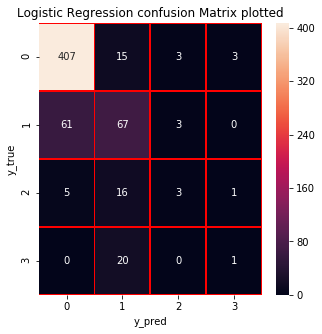

In [258]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
print(classification_report(y_test,y_pred))
plt.title("Logistic Regression confusion Matrix plotted")
plt.show()

#### LogisticRegression Classifier - Cross Validation

In [259]:
# 10- foldCross Validation using LogisticRegression 

lr_cv_r10_scores = cross_val_score(lr, x, y, cv=10)
print(lr_cv_r10_scores)
print("Logistic Regression  Mean 10-Fold R Squared: {}".format(np.mean(lr_cv_r10_scores)))

[0.73563218 0.74712644 0.79885057 0.76436782 0.83815029 0.77906977
 0.85465116 0.83139535 0.87209302 0.52046784]
Logistic Regression  Mean 10-Fold R Squared: 0.7741804439094484


#### Visualizing decision boundary and results

In [260]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(x_train.iloc[:,[2,3]],y_train)
score.append(lr1.score(x_test.iloc[:,[2,3]],y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr1.score(x_test.iloc[:,[2,3]],y_test)))

test accuracy 0.7074380165289256


(1.0, 5.990000000000005)

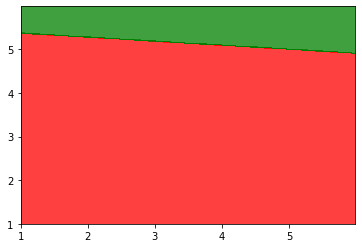

In [261]:
#visualizing decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = x_train.iloc[:,[2,3]], y_train.iloc[:]
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

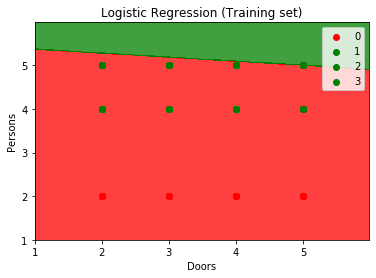

In [262]:
#visualizing decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = x_train.iloc[:,[2,3]].values, y_train.iloc[:].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Doors')
plt.ylabel('Persons')
plt.legend()
plt.show()

#### Predicting a TEST sample:

In [263]:
#Predicting a TEST sample

dictVar = {'cost' : 'vhigh', 'maint' : 'low', 'doors' : 4,'persons':'more','lug_boot':'small','safety':'med'}
dataTest = pd.DataFrame(dictVar, index=[0])

dictTarget = {'0' : 'unacc', '1' : 'acc', '2' : 'good','3':'vgood'}

In [264]:
#Applying the same data transformations on the test sample

dataTest['cost'].replace(('vhigh','high', 'med', 'low'),(3,2,1,0),inplace=True)
dataTest['maint'].replace(('vhigh','high', 'med', 'low'),(3,2,1,0),inplace=True)
dataTest['lug_boot'].replace(('small', 'med', 'big'),(2,1,0),inplace=True)
dataTest['safety'].replace(('high', 'med', 'low'),(2,1,0),inplace=True)
dataTest['doors'].replace('5more', 5, inplace = True)
dataTest['persons'].replace('more', 5, inplace = True)
dataTest['doors'] = pd.to_numeric(data['doors'])
dataTest['persons'] = pd.to_numeric(data['persons'])

In [270]:
print("Predicted value for the test sample using Random Forest --> ", dictTarget[str(rf.predict(dataTest)[0])])

Predicted value for the test sample using Random Forest -->  unacc


In [269]:
print("Predicted value for the test sample using Logistic Regression --> ", dictTarget[str(lr.predict(dataTest)[0])])

Predicted value for the test sample using Random Forest -->  unacc
